In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

전화 : 02-580-0718

운영시간 : 09 ~ 18시, 점심시간 : 12 ~ 13시

이메일 : bigcontest@kait.or.kr

아지트 링크 : https://big.agit.io/planet_invitations/9fc93407b9afa0edfcb1a46cc246a519

In [414]:
tr_pledge = pd.read_csv('C:/Users/SAMSUNG/Desktop/new/빅콘테스트/2019빅콘테스트_챔피언스리그_데이터_수정/train_pledge.csv')

In [3]:
tr_label = pd.read_csv('C:/Users/SAMSUNG/Desktop/new/빅콘테스트/train_label_add.csv')

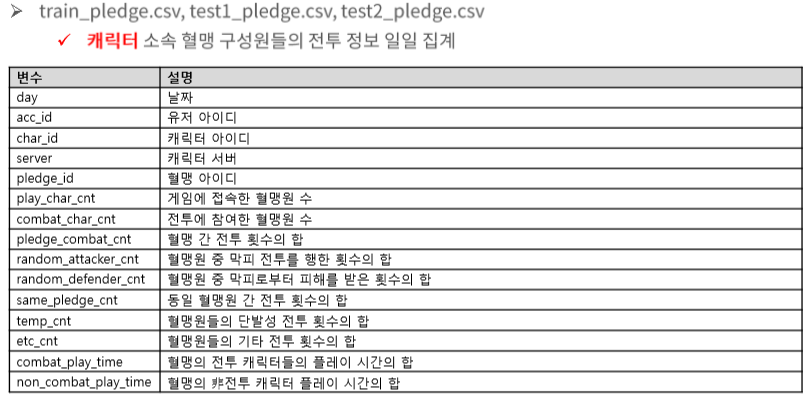

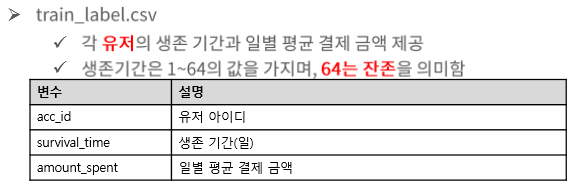

In [5]:
tr_pledge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083384 entries, 0 to 1083383
Data columns (total 15 columns):
day                     1083384 non-null int64
acc_id                  1083384 non-null int64
char_id                 1083384 non-null int64
server                  1083384 non-null object
pledge_id               1083384 non-null int64
play_char_cnt           1083384 non-null float64
combat_char_cnt         1083384 non-null float64
pledge_combat_cnt       1083384 non-null float64
random_attacker_cnt     1083384 non-null float64
random_defender_cnt     1083384 non-null float64
same_pledge_cnt         1083384 non-null float64
temp_cnt                1083384 non-null float64
etc_cnt                 1083384 non-null float64
combat_play_time        1083384 non-null float64
non_combat_play_time    1083384 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 124.0+ MB


In [6]:
tr_pledge.describe()

# 혈맹의 비전투 캐릭터 플레이 시간의 합 사분위수, min = 0, max값만 존재

,day,acc_id,char_id,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
count,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06,1.083384e+06
mean,1.483649e+01,6.539837e+04,1.985042e+05,2.013443e+04,1.284023e+00,4.980107e-01,2.483184e-01,2.783927e-01,2.591830e-01,2.889703e-01,6.244236e-01,5.703395e-01,1.136674e+00,3.723338e-02
std,8.114266e+00,3.747861e+04,1.146090e+05,1.142861e+04,1.403973e+00,6.507725e-01,1.090031e+00,9.603092e-01,1.133194e+00,1.174905e+00,1.075314e+00,1.234925e+00,1.326884e+00,2.447583e-01
min,1.000000e+00,5.000000e+00,3.000000e+00,2.000000e+00,3.608932e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,3.287300e+04,9.858200e+04,1.018375e+04,2.165359e-01,3.608932e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.683475e-02,0.000000e+00
50%,1.500000e+01,6.564500e+04,1.981870e+05,2.048900e+04,8.300543e-01,2.887146e-01,0.000000e+00,0.000000e+00,7.153134e-02,0.000000e+00,2.966491e-01,1.203305e-01,7.930951e-01,0.000000e+00
75%,2.200000e+01,9.749500e+04,2.976210e+05,3.014500e+04,1.804466e+00,6.856971e-01,3.460409e-02,0.000000e+00,2.145940e-01,0.000000e+00,8.899474e-01,5.096351e-01,1.638430e+00,0.000000e+00
max,2.800000e+01,1.304730e+05,3.974250e+05,3.962500e+04,9.094508e+00,6.171274e+00,4.156133e+01,1.245537e+02,7.339115e+01,3.421584e+01,5.389126e+01,4.847196e+01,1.259234e+01,6.676385e+00


In [7]:
tr_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,0.000000
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.006139
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000347
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001042
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,0.000000


In [505]:
# combat_play_time값이 0이 아닐경우 non_combat_play_time 데이터가 0인 오류로 인해 열 제거 결정
del tr_pledge['non_combat_play_time']

# acc기준으로 합한 후 label 데이터와 merge시키기

In [506]:
# acc기준으로 합한 후 label 데이터와 merge시키기
groups = tr_pledge.groupby([tr_pledge.acc_id, tr_pledge.day])
print(groups,'\n')

In [507]:
group_sum = groups.sum()
group_sum

char_id  pledge_id  play_char_cnt  combat_char_cnt  \
acc_id day                                                       
5      9     321231      25467       0.649608         0.252625   
       14    321231      25467       0.396983         0.180447   
       20    321231      25467       0.505250         0.108268   
       22    519304      71278       0.721786         0.252625   
       23    519304      71278       0.541340         0.036089   
...             ...        ...            ...              ...   
130473 24     96346      29194       1.948823         1.587930   
       25     96346      29194       1.876645         1.551841   
       26     96346      29194       1.804466         1.587930   
       27     96346      29194       1.840555         1.443573   
       28     96346      29194       1.840555         1.407483   

            pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
acc_id day                                                                
5      9             0.000000             0.000000             0.143063   
       14            0.000000             0.000000             0.000000   
       20            0.000000             0.000000             0.071531   
       22            0.000000             0.548695             0.357657   
       23            0.000000             0.710075             0.000000   
...                       ...                  ...                  ...   
130473 24            3.209074             0.742351             0.000000   
       25            3.615217             3.582653             0.000000   
       26            6.980920             0.000000             0.000000   
       27            3.771846             1.258770             0.000000   
       28            5.021236             0.000000             0.429188   

            same_pledge_cnt  temp_cnt   etc_cnt  combat_play_time  
acc_id day                                                         
5      9           0.000000  0.692181  0.120331          0.399849  
       14          0.000000  0.197766  0.219426          0.441895  
       20          0.000000  0.296649  0.056626          0.593982  
       22          0.000000  0.098883  0.092017          0.610198  
       23          0.000000  0.000000  0.000000          0.339385  
...                     ...       ...       ...               ...  
130473 24          0.795717  1.384363  2.095167          3.435317  
       25          0.000000  1.186597  2.555254          3.890417  
       26          3.978586  0.593298  4.197411          3.636979  
       27          0.795717  1.186597  1.833271          3.211068  
       28          0.000000  0.988830  2.802993          3.366282  

[748810 rows x 11 columns]

In [508]:
aa = group_sum.reset_index()

In [511]:
groups = aa.groupby(aa.acc_id).sum()

In [512]:
groups = groups.reset_index()

In [513]:
# label merge
merge_df = pd.merge(groups, tr_label, how = 'left', on = 'acc_id')
merge_df

,acc_id,day,char_id,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,Unnamed: 0,survival_time,amount_spent,secession,total_spent
0,5,218,3851049,448985,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,12651,60,0.000000,1,0.000000
1,8,406,21422094,3027211,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,5494,64,0.020310,0,1.299843
2,17,406,7524296,89976,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,6811,64,0.070642,0,4.521100
3,20,387,5388012,787448,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,16854,64,0.052137,0,3.336752
4,21,378,2945403,125469,1.660109,0.360893,0.000000,0.000000,0.071531,0.000000,0.791064,0.035391,0.501896,38362,64,0.184267,0,11.793078
5,31,406,9702728,565124,11.404225,9.022330,7.840558,0.000000,9.227543,0.000000,12.755913,23.775893,40.095609,15073,45,0.051316,1,2.309242
6,38,196,1417437,167391,8.300543,3.248039,0.200339,0.000000,0.286125,0.000000,4.845269,5.535203,9.101424,1057,64,0.517168,0,33.098736
7,41,28,240864,36763,0.974412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29395,3,0.000000,1,0.000000
8,43,388,10479618,187623,18.189017,7.506578,0.644729,10.005606,2.145940,0.795717,22.841984,13.738913,15.073209,27090,64,0.356197,0,22.796592
9,53,406,2780516,1010390,3.428485,2.923235,0.429819,0.903732,1.072970,1.591434,5.141918,6.136856,7.892611,19673,64,0.017160,0,1.098251


### merge로 인해 생기는 열 제거
### log_in_freq를 생성했기때문에 day는 필요없으므로 제거

In [514]:
del merge_df['Unnamed: 0']
del merge_df['day']

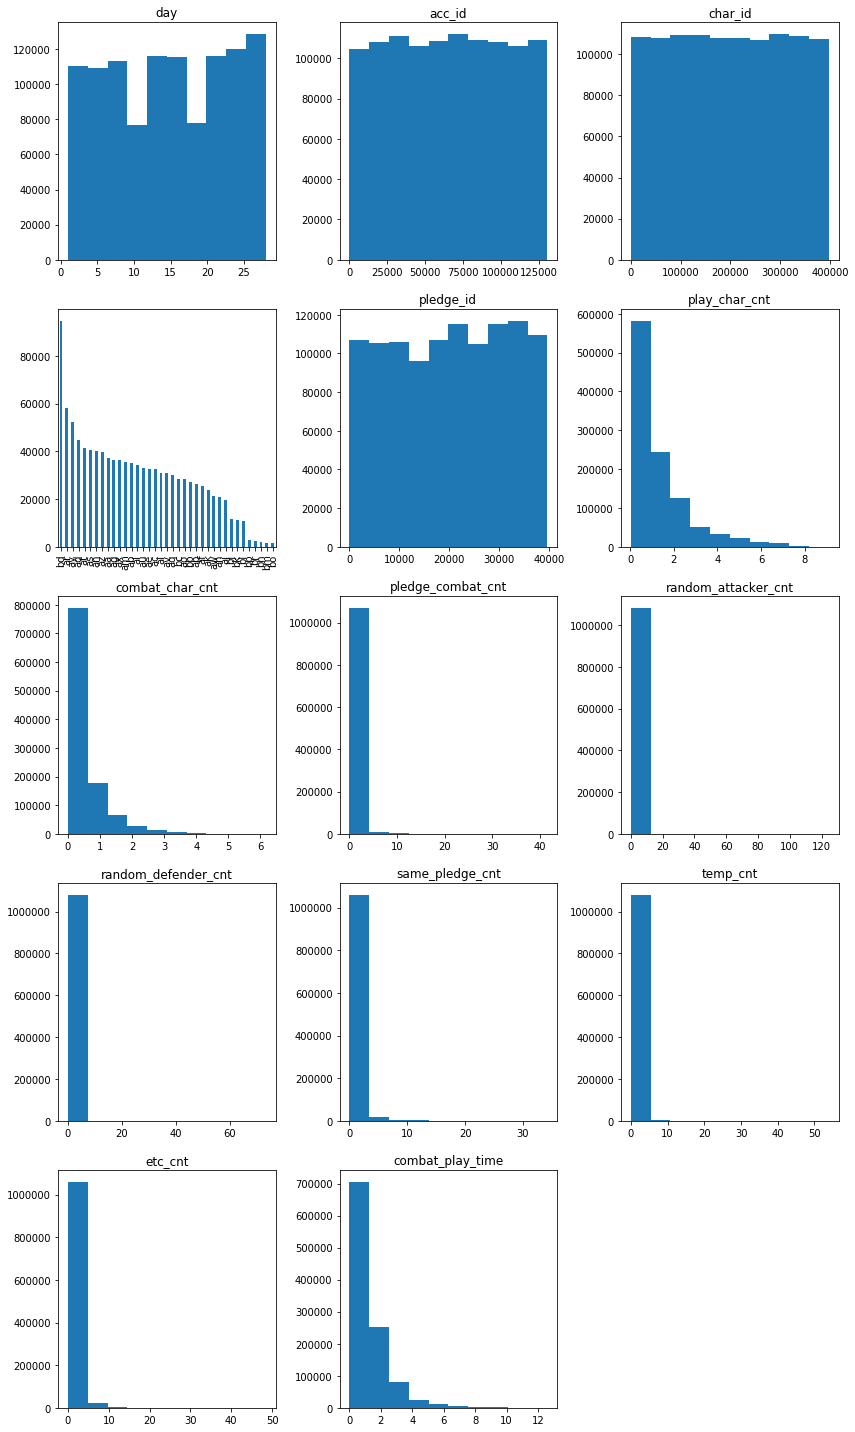

In [515]:
# 변수별 데이터 분포 그래프
i = 0
plt.figure(figsize = (12,20))
for col in tr_pledge.columns:
    plt.subplot(5,3,i+1)
    if col == 'server':
        tr_pledge.server.value_counts().plot(kind = 'bar')
    else:
        plt.hist(tr_pledge[col])
        plt.title(col)
    i += 1

# plt.show()
plt.tight_layout()

### 접속일 계산

In [425]:
freq = []
for i in aa.acc_id.unique():
    freq.append([i,aa[aa.acc_id == i].shape[0]])

In [426]:
new = pd.DataFrame(sorted(freq))
new.columns = ['acc_id', 'log_in_freq']
new

,acc_id,log_in_freq
0,5,10
1,8,28
2,17,28
3,20,27
4,21,26
5,31,28
6,38,8
7,41,1
8,43,27
9,53,28


### pledge에 접속일 merge 시키기

In [522]:
merge_df = pd.merge(merge_df, new, how = 'left', on = 'acc_id')

In [428]:
merge_df.corr()

,acc_id,char_id,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,survival_time,amount_spent,secession,total_spent,log_in_freq
acc_id,1.000000,0.001399,0.005486,-0.001297,0.001732,0.003177,0.004713,-0.005645,0.005385,-0.001040,0.002382,-0.001644,-0.003853,0.000610,0.005698,0.000509,0.006319,-0.002232
char_id,0.001399,1.000000,0.635152,0.434775,0.326575,0.161031,0.235575,0.129951,0.268751,0.349184,0.183491,0.380305,0.139530,0.214956,-0.025938,-0.182217,0.128225,0.469471
pledge_id,0.005486,0.635152,1.000000,0.428437,0.338364,0.198431,0.228794,0.165526,0.250329,0.342287,0.203107,0.396847,0.154061,0.221154,-0.022396,-0.188275,0.126533,0.467226
play_char_cnt,-0.001297,0.434775,0.428437,1.000000,0.810449,0.332930,0.569430,0.260136,0.659583,0.804161,0.509076,0.790972,-0.027679,0.131342,0.004874,-0.089687,0.137335,0.302813
combat_char_cnt,0.001732,0.326575,0.338364,0.810449,1.000000,0.627370,0.613315,0.301581,0.698597,0.727370,0.840725,0.807790,-0.115635,0.123898,0.019246,-0.086191,0.203801,0.295204
pledge_combat_cnt,0.003177,0.161031,0.198431,0.332930,0.627370,1.000000,0.441620,0.139516,0.563558,0.393096,0.589691,0.494913,-0.060316,0.131515,0.032157,-0.134556,0.245500,0.159404
random_attacker_cnt,0.004713,0.235575,0.228794,0.569430,0.613315,0.441620,1.000000,0.130381,0.641546,0.591146,0.417075,0.490935,-0.082957,0.143503,0.018426,-0.121600,0.180316,0.195344
random_defender_cnt,-0.005645,0.129951,0.165526,0.260136,0.301581,0.139516,0.130381,1.000000,0.119687,0.182689,0.104429,0.392135,0.007151,-0.003670,0.000379,0.025982,-0.012220,0.126750
same_pledge_cnt,0.005385,0.268751,0.250329,0.659583,0.698597,0.563558,0.641546,0.119687,1.000000,0.636190,0.518410,0.649098,-0.106324,0.168169,0.027634,-0.148046,0.237696,0.240261
temp_cnt,-0.001040,0.349184,0.342287,0.804161,0.727370,0.393096,0.591146,0.182689,0.636190,1.000000,0.452247,0.684763,-0.100137,0.158025,0.003907,-0.121235,0.157065,0.271793


In [21]:
merge_df.describe()

,acc_id,char_id,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,survival_time,amount_spent,secession,total_spent,log_in_freq
count,33854.000000,3.385400e+04,3.385400e+04,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000,33854.000000
mean,65313.638595,6.352462e+06,6.443350e+05,41.090869,15.937167,7.946598,8.909028,8.294286,9.247527,19.982589,18.251808,36.375434,1.191530,44.659390,0.129689,0.482572,4.361891,22.118804
std,37534.480584,5.384787e+06,5.516376e+05,49.225772,21.011267,27.309829,18.495528,28.146891,17.367793,28.758156,33.000926,40.796818,5.548046,23.288685,0.645217,0.499704,7.003847,8.206461
min,5.000000,6.300000e+01,3.600000e+01,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,32744.250000,2.364060e+06,2.465838e+05,7.723114,2.381895,0.000000,0.000000,0.929907,0.000000,2.175427,1.026348,7.531392,0.000000,23.000000,0.000000,0.000000,0.000000,19.000000
50%,65552.500000,5.413230e+06,5.569110e+05,25.876042,8.877973,0.162093,1.904293,3.361973,1.591434,10.481603,6.058995,25.408059,0.001853,64.000000,0.030777,0.000000,1.145040,26.000000
75%,97701.750000,9.019164e+06,8.967560e+05,56.145959,20.679180,1.573575,9.456912,8.154573,11.140041,27.069234,17.660272,50.574321,0.168071,64.000000,0.123591,1.000000,5.557929,28.000000
max,130473.000000,1.333694e+08,1.461536e+07,1089.933534,268.612804,385.354787,293.487029,874.399086,292.823930,726.295986,379.104811,661.218003,127.504953,64.000000,39.412632,1.000000,97.515488,28.000000


### 전체 유저 분포와 비교하기

In [411]:
act = pd.read_csv('C:/Users/SAMSUNG/Desktop/new/빅콘테스트/2019빅콘테스트_챔피언스리그_데이터_수정/train_activity.csv')

In [18]:
act.head()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


In [19]:
act_groups = act.groupby([act.acc_id, act.day])
act_group_sum = act_groups.sum()
bb = act_group_sum.reset_index()

freq = []
for i in bb.acc_id.unique():
    freq.append([i,bb[bb.acc_id == i].shape[0]])
    
act_new = pd.DataFrame(sorted(freq))
act_new.columns = ['acc_id', 'log_in_freq']

In [21]:
new.shape[0], act_new.shape[0]

(33109, 40000)

In [50]:
bb_groups = bb.groupby(bb.acc_id).agg('sum')

In [53]:
act_merge_df = pd.merge(bb_groups,tr_label, on='acc_id', how = 'left')

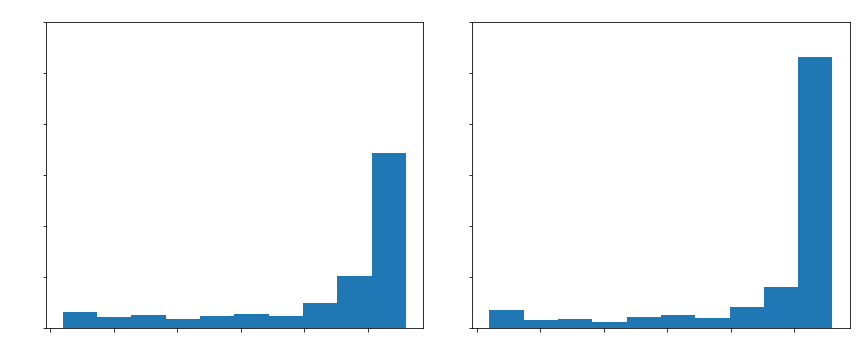

In [69]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(new['log_in_freq'])
plt.xticks(color = 'w')
plt.yticks(np.arange(0,31000, 5000), color = 'w')
plt.title('pledge',color = 'w')
plt.subplot(1,2,2)
plt.hist(act_new['log_in_freq'])
plt.xticks(color = 'w')
plt.yticks(np.arange(0,31000, 5000), color = 'w')
plt.title('all', color = 'w')
plt.tight_layout()

## pledge데이터 이탈, 비이탈 유저의 변수별 분포 비교

In [429]:
non_retain = merge_df[merge_df.secession == 1] # survival time < 64
retain = merge_df[merge_df.secession == 0] # survival time = 64

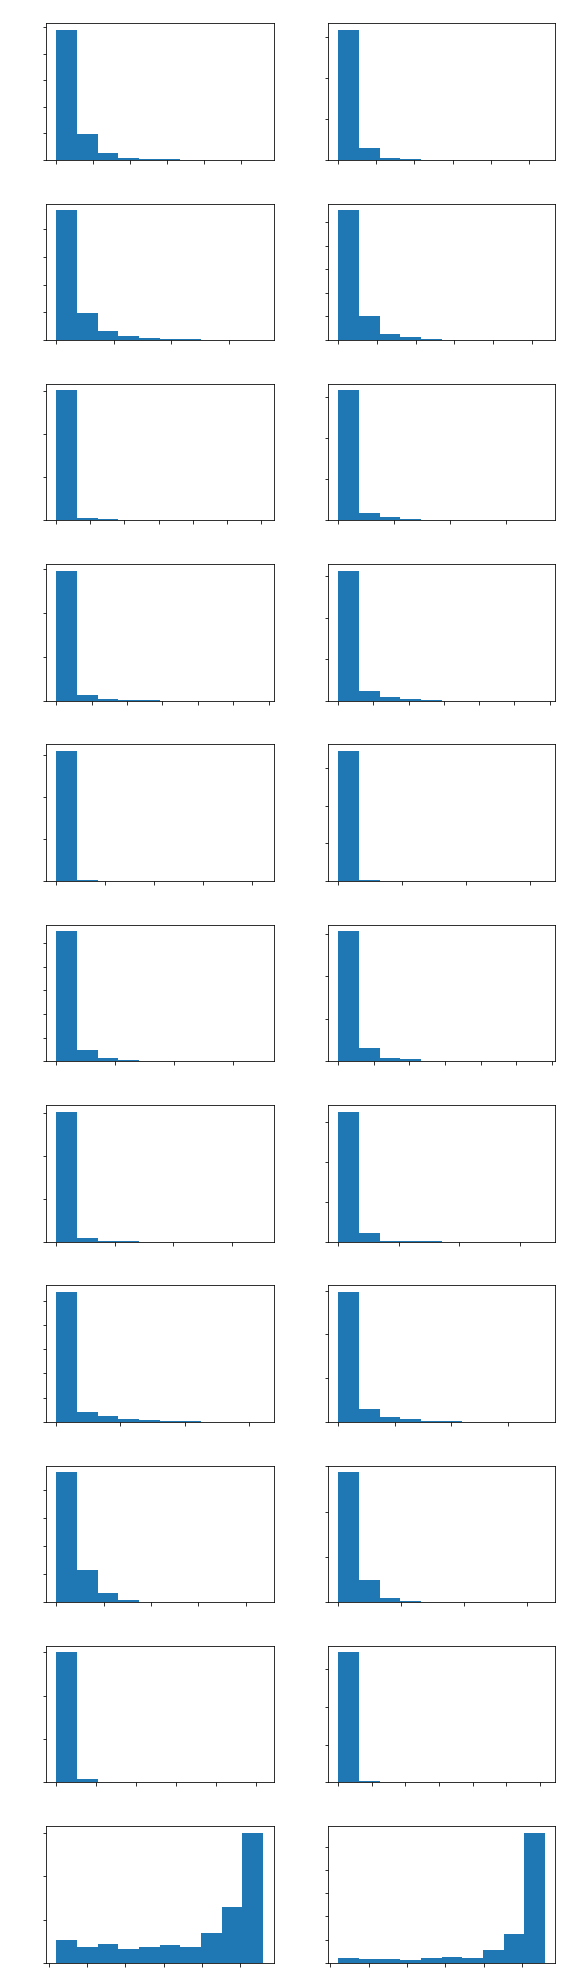

In [74]:
cols = ['play_char_cnt', 'combat_char_cnt',
       'pledge_combat_cnt', 'random_attacker_cnt', 'random_defender_cnt',
       'same_pledge_cnt', 'temp_cnt', 'etc_cnt', 'combat_play_time',
       'non_combat_play_time','log_in_freq']
i = 2
plt.figure(figsize = (8,50))
for col in cols:
    plt.subplot(20,2,i-1)
    plt.hist(non_retain[col])
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.title('non_'+col, color = 'w')
    plt.subplot(20,2,i)
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.hist(retain[col])
    plt.title(col, color = 'w')
    i += 2

# plt.show()
plt.tight_layout()

In [91]:
merge_df.head()

,acc_id,char_id,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,survival_time,amount_spent,secession,total_spent,log_in_freq
0,5,3529818,423518,5.160773,1.479662,0.000000,1.936569,0.786845,0.000000,2.373193,0.757374,4.585635,0.004402,60,0.000000,1,0.000000,9
1,8,20995126,2949837,195.495843,56.515874,2.633553,32.050217,20.243369,29.441536,89.785807,60.462542,132.614607,0.033823,64,0.020310,0,1.299843,27
2,17,7389252,88020,69.688476,21.400966,0.486279,9.230979,10.872764,1.591434,36.388962,12.075521,64.415146,0.000000,64,0.070642,0,4.521100,27
3,20,5238345,762418,54.061800,24.937720,7.782278,11.974452,6.509352,11.140041,27.885019,44.147141,66.207515,0.000000,64,0.052137,0,3.336752,27
4,21,2836314,120822,1.587930,0.360893,0.000000,0.000000,0.071531,0.000000,0.791064,0.035391,0.501896,0.813481,64,0.184267,0,11.793078,25


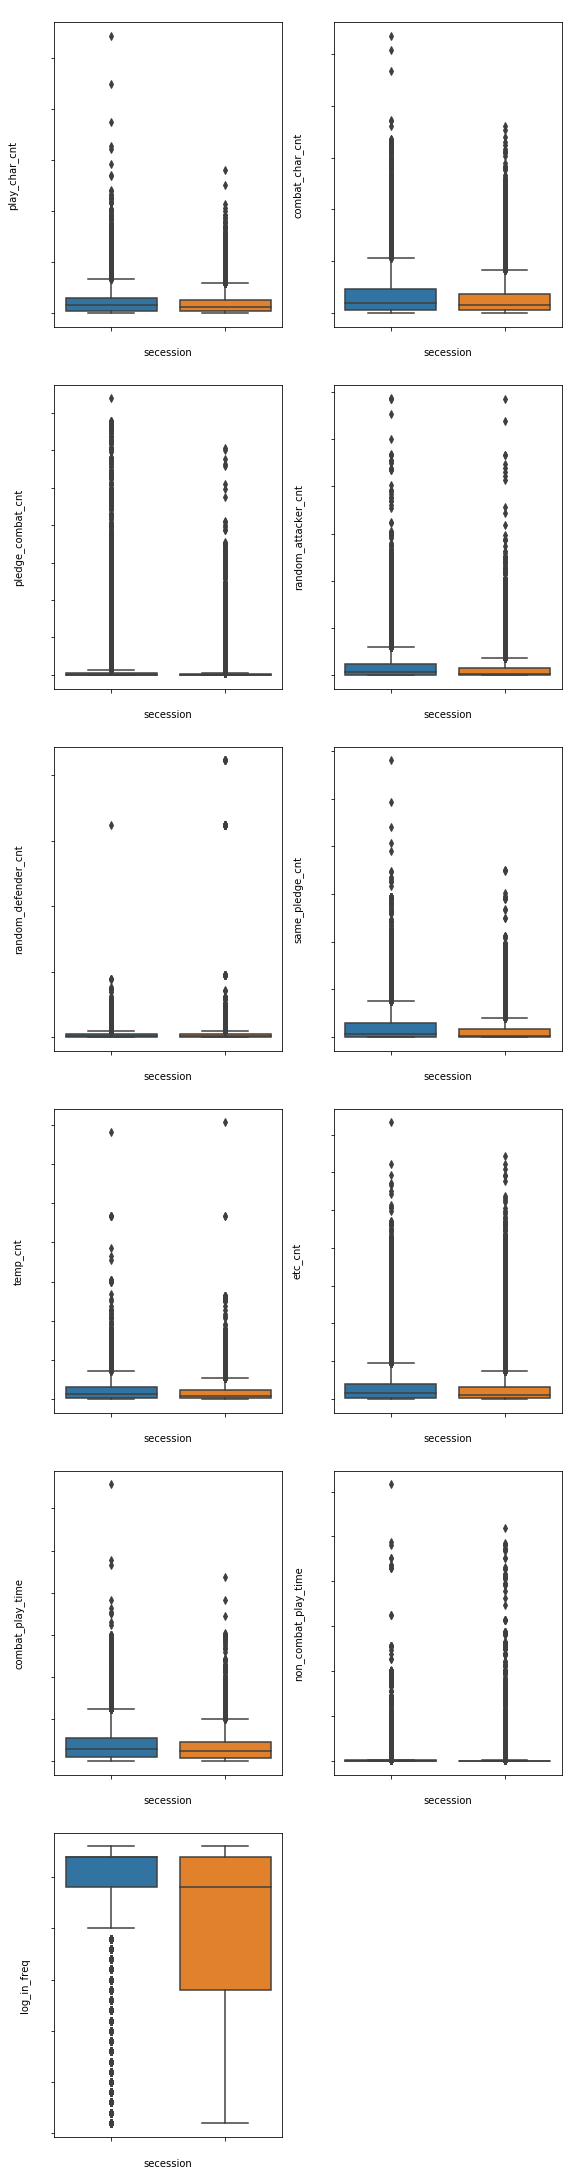

In [95]:
i = 1
plt.figure(figsize = (8,50))
for col in cols:
    plt.subplot(10,2,i)
    sns.boxplot(x = 'secession', y = col, data = merge_df)
#     plt.boxplot((non_retain[col], retain[col]))
    plt.xticks(color = 'w')
    plt.yticks(color = 'w')
    plt.title(col, color = 'w')

    i += 1

# plt.show()
plt.tight_layout()

In [88]:
non_retain.shape[0], retain.shape[0]

(15622, 17487)

In [430]:
for col in cols:
    a = non_retain[non_retain[col] == 0].shape[0]
    b = retain[retain[col] == 0].shape[0]
    print(col, ':',a, b)

play_char_cnt : 0 0
combat_char_cnt : 1131 667
pledge_combat_cnt : 5083 4594
random_attacker_cnt : 7207 5516
random_defender_cnt : 1927 1685
same_pledge_cnt : 7988 6220
temp_cnt : 1404 897
etc_cnt : 1517 1192
combat_play_time : 1131 667
non_combat_play_time : 7112 6706
log_in_freq : 0 0


### 과금량 비교해보기

In [22]:
act_group = bb.groupby(bb.acc_id).agg('sum')

In [23]:
act_merge_df =  pd.merge(act_group, tr_label, how = 'left', on = 'acc_id')

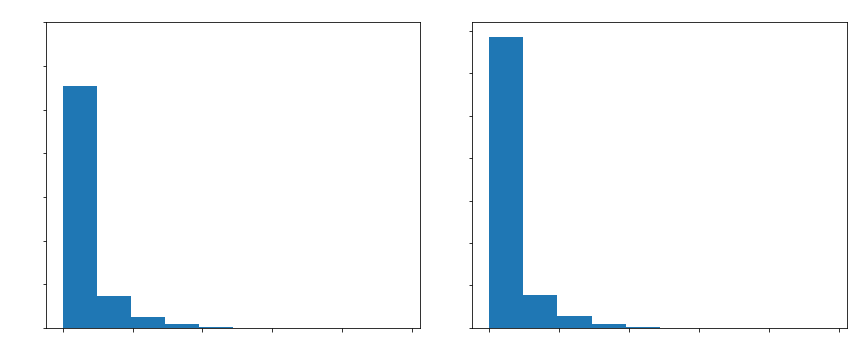

In [96]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(merge_df['total_spent'])
plt.xticks(color = 'w')
plt.yticks(np.arange(0, 36000, 5000), color = 'w')
plt.title('pledge',color = 'w')
plt.subplot(1,2,2)
plt.hist(act_merge_df['total_spent'])
plt.xticks(color = 'w')
plt.yticks(np.arange(0, 36000, 5000), color = 'w')
plt.title('all', color = 'w')
plt.tight_layout()

### 분포 시각화 secession, survival_time, total_spent

In [431]:
aa = merge_df.drop(['acc_id', 'char_id', 'survival_time'], axis = 1)

In [432]:
aa.columns

Index(['pledge_id', 'play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'same_pledge_cnt',
       'temp_cnt', 'etc_cnt', 'combat_play_time', 'non_combat_play_time',
       'amount_spent', 'secession', 'total_spent', 'log_in_freq'],
      dtype='object')

C:\Users\SAMSUNG\Desktop\new\anacanda\envs\mypython\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SAMSUNG\Desktop\new\anacanda\envs\mypython\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


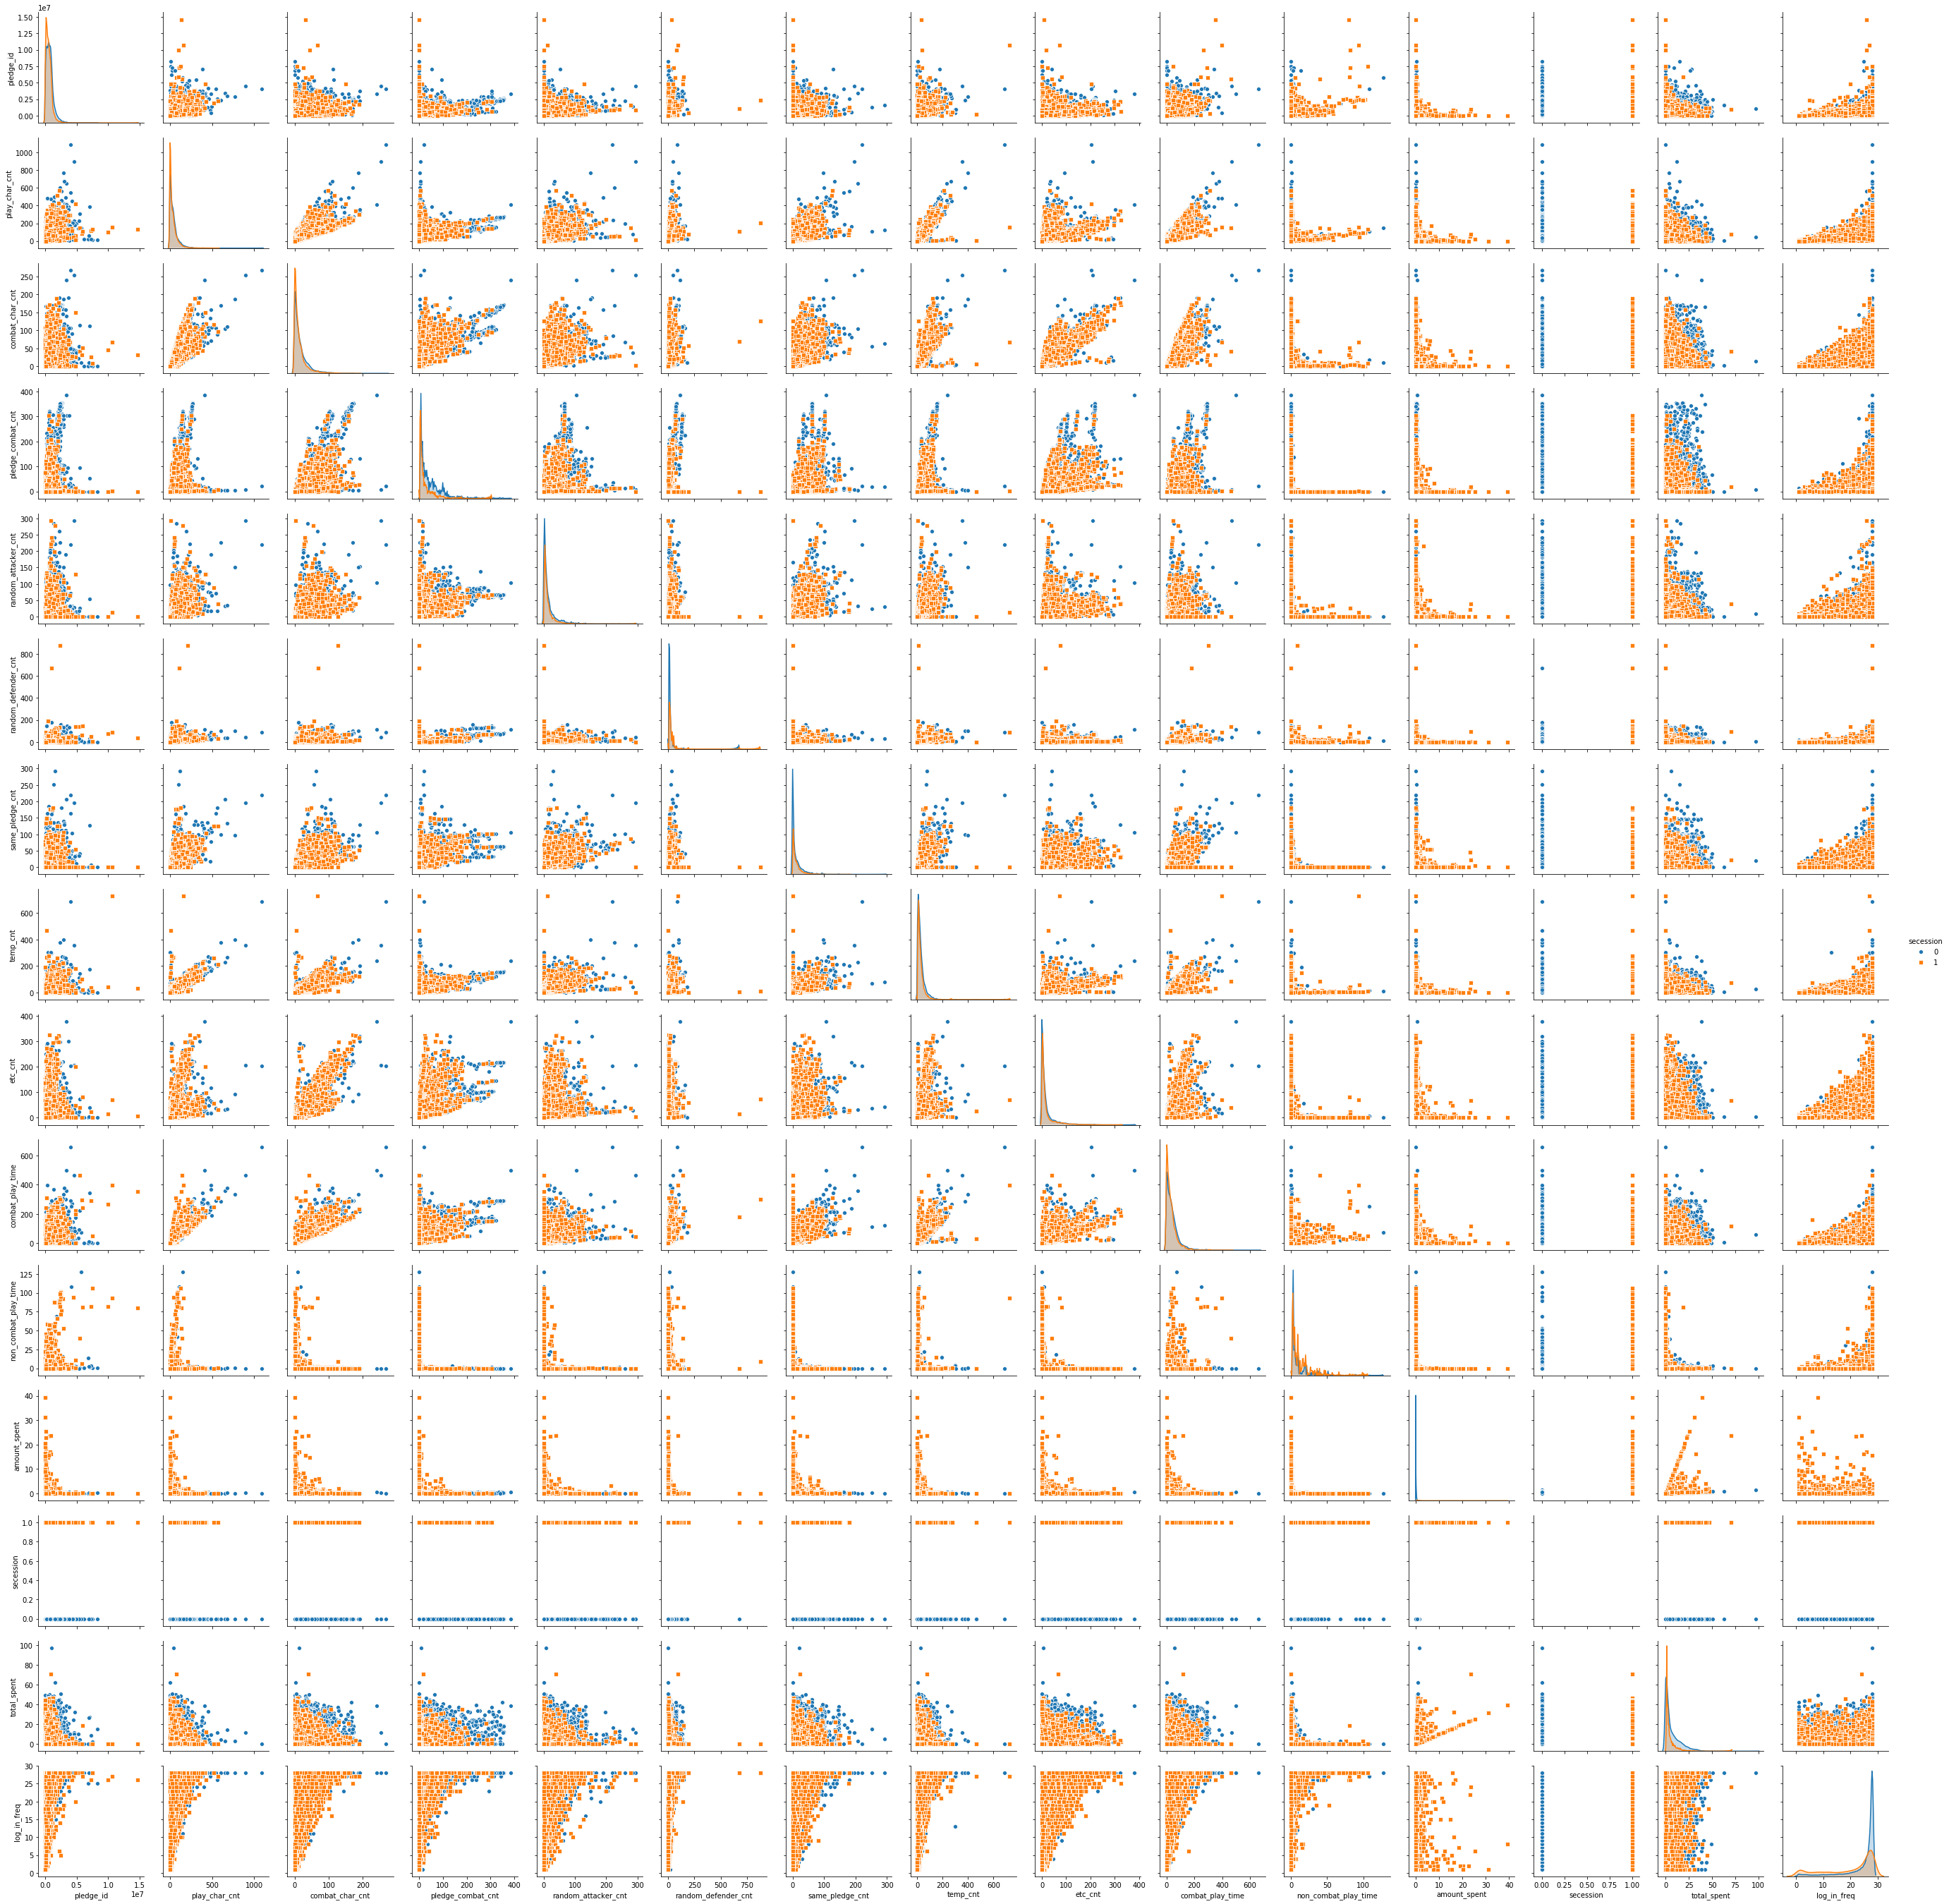

In [29]:
sns.pairplot(aa, hue = 'secession', markers=['o', 's'])
plt.show()

### pledge 기준 정렬

In [433]:
tr_pledge.groupby(tr_pledge.pledge_id).agg('sum').reset_index()

,pledge_id,day,acc_id,char_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
0,2,24,78896,555458,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000579
1,3,9268,36717692,123743889,638.167434,501.605450,655.935093,505.024914,111.588889,493.344664,592.408339,686.124567,940.361074,0.000695
2,4,31,230082,763372,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000463
3,8,131,235413,1565046,0.324804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009846
4,9,1,111407,2663,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000116
5,12,440,1109700,10725340,1.335305,0.938322,0.000000,0.000000,0.000000,0.000000,0.988830,0.679513,1.474297,0.171662
6,14,32,139490,430972,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695
7,17,429,3485733,5680522,1.407483,0.072179,0.000000,0.000000,0.071531,0.000000,0.000000,0.007078,0.053630,0.920741
8,18,149,1166784,3487080,0.433072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005792
9,20,150,332690,1437966,0.396983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014711


In [434]:
tr_pledge.groupby(tr_pledge.pledge_id).agg('sum').reset_index().corr()

,pledge_id,day,acc_id,char_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time
pledge_id,1.000000,0.010235,0.010772,0.008855,0.001389,0.005742,0.011030,0.003125,0.012397,0.000921,0.000149,0.008279,0.007653,0.011508
day,0.010235,1.000000,0.986721,0.987162,0.843866,0.804239,0.502467,0.636243,0.353162,0.717655,0.805949,0.634867,0.846294,0.128261
acc_id,0.010772,0.986721,1.000000,0.985155,0.835953,0.796715,0.513922,0.633370,0.349034,0.723594,0.801495,0.628821,0.845517,0.128264
char_id,0.008855,0.987162,0.985155,1.000000,0.838125,0.799262,0.508047,0.639457,0.355376,0.729412,0.804449,0.628383,0.847723,0.127322
play_char_cnt,0.001389,0.843866,0.835953,0.838125,1.000000,0.879978,0.470886,0.689638,0.369761,0.778737,0.928220,0.658260,0.892971,0.038377
combat_char_cnt,0.005742,0.804239,0.796715,0.799262,0.879978,1.000000,0.704279,0.730457,0.395348,0.808152,0.870577,0.896026,0.922416,-0.001698
pledge_combat_cnt,0.011030,0.502467,0.513922,0.508047,0.470886,0.704279,1.000000,0.570352,0.259045,0.684108,0.549865,0.721264,0.676776,-0.004486
random_attacker_cnt,0.003125,0.636243,0.633370,0.639457,0.689638,0.730457,0.570352,1.000000,0.265597,0.763172,0.743165,0.578386,0.689056,-0.002523
random_defender_cnt,0.012397,0.353162,0.349034,0.355376,0.369761,0.395348,0.259045,0.265597,1.000000,0.266788,0.330846,0.239079,0.450281,0.011828
same_pledge_cnt,0.000921,0.717655,0.723594,0.729412,0.778737,0.808152,0.684108,0.763172,0.266788,1.000000,0.799579,0.662115,0.825225,-0.006655


play_char_cnt, combat_char_cnt -> 77.33
play_char_cnt, temp_cnt -> 61.22
play_char_cnt, combat_play_time -> 70.18
play_char_cnt, etc_cnt -> 45.24
play_char_cnt, same_pledge_cnt -> 30.59

combat_char_cnt, etc_cnt -> 75.30
cambat_char_cnt, combat_play_time -> 72.49
cambat_char_cnt, temp_cnt -> 54.30
cambat_char_cnt, , pledge_combat_cnt -> 39.74
cambat_char_cnt, random_attacker_cnt -> 34.00

pledge_combat_cnt, etc_cnt -> 32.21

same_pledge_cnt, combat_play_time -> 31.87

temp_cnt, combat_play_time -> 48.96

etc_cnt, combat_play_time -> 53.18

### skewed 확인

    skewness가 1보다 큰 feature들에 log 변환을 해주도록 하겠습니다.

In [435]:
merge_df_log = merge_df.drop(['acc_id', 'char_id', 'pledge_id', 'survival_time', 'amount_spent'], axis=1)

In [198]:
skewness = merge_df_log.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

random_defender_cnt     20.837773
non_combat_play_time     9.137337
pledge_combat_cnt        6.119639
random_attacker_cnt      4.768157
temp_cnt                 4.713060
same_pledge_cnt          3.536455
etc_cnt                  3.342910
play_char_cnt            3.135345
combat_char_cnt          2.770749
combat_play_time         2.507060
total_spent              2.323481
secession                0.112842
log_in_freq             -1.429884
dtype: float64

### data log 변환

In [439]:
merge_df_log['play_char_cnt'] = np.log1p(merge_df_log['play_char_cnt'].replace(0,1.0e-4))
merge_df_log['combat_char_cnt'] = np.log1p(merge_df_log['combat_char_cnt'].replace(0,1.0e-4))
merge_df_log['pledge_combat_cnt'] = np.log1p(merge_df_log['pledge_combat_cnt'].replace(0,1.0e-4))
merge_df_log['random_attacker_cnt'] = np.log1p(merge_df_log['random_attacker_cnt'].replace(0,1.0e-4))
merge_df_log['random_defender_cnt'] = np.log1p(merge_df_log['random_defender_cnt'].replace(0,1.0e-4))
merge_df_log['same_pledge_cnt'] = np.log1p(merge_df_log['same_pledge_cnt'].replace(0,1.0e-4))
merge_df_log['temp_cnt'] = np.log1p(merge_df_log['temp_cnt'].replace(0,1.0e-4))
merge_df_log['etc_cnt'] = np.log1p(merge_df_log['etc_cnt'].replace(0,1.0e-4))
merge_df_log['combat_play_time'] = np.log1p(merge_df_log['combat_play_time'].replace(0,1.0e-4))
merge_df_log['non_combat_play_time'] = np.log1p(merge_df_log['non_combat_play_time'].replace(0,1.0e-4))
merge_df_log['log_in_freq'] = np.log1p(merge_df_log['log_in_freq'].replace(0,1.0e-4))

In [200]:
merge_df_log.head()

,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time,secession,total_spent,log_in_freq
0,1.818202,0.908122,0.000100,1.077242,0.580451,0.000100,1.215860,0.563821,1.720198,0.004392,1,0.000000,2.302585
1,5.280641,4.052061,1.290211,3.498028,3.056045,3.415808,4.508503,4.118428,4.894960,0.033263,0,1.299843,3.332205
2,4.258283,3.109104,0.396275,2.325420,2.474247,0.952212,3.621376,2.570742,4.180754,0.000100,0,4.521100,3.332205
3,4.008456,3.255698,2.172736,2.562982,2.016149,2.496509,3.363323,3.809927,4.207785,0.000100,0,3.336752,3.332205
4,0.950858,0.308141,0.000100,0.000100,0.069089,0.000100,0.582810,0.034779,0.406728,0.595248,0,11.793078,3.258097


In [201]:
skewness = merge_df_log.apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

non_combat_play_time    3.245257
total_spent             2.323481
pledge_combat_cnt       1.844479
random_attacker_cnt     0.612540
same_pledge_cnt         0.558523
random_defender_cnt     0.513122
etc_cnt                 0.286055
secession               0.112842
combat_char_cnt        -0.146005
temp_cnt               -0.150142
play_char_cnt          -0.419129
combat_play_time       -0.722277
log_in_freq            -2.373015
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0D6ED9668>,
      dtype=object)

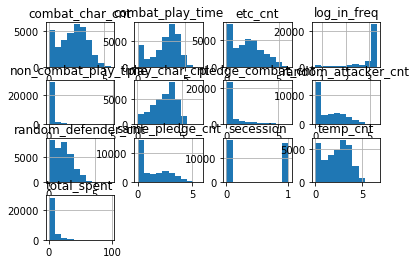

In [441]:
merge_df_log.hist()

## 데이터 전처리 전 baseline

In [528]:
merge_df_base = merge_df.drop(['acc_id', 'char_id', 'pledge_id', 'survival_time', 'amount_spent'], axis=1)

In [529]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merge_df_base.drop(['secession'], axis=1),
                                                    merge_df_base.secession,
                                                    test_size = 0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((17772, 11), (5925, 11), (10157, 11), (17772,), (5925,), (10157,))

### logistic regression

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
pred_y = lr.predict(X_test)

print(classification_report(y_test, pred_y))

C:\Users\SAMSUNG\Desktop\new\anacanda\envs\mypython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5231
           1       0.69      0.65      0.67      4702

    accuracy                           0.69      9933
   macro avg       0.69      0.69      0.69      9933
weighted avg       0.69      0.69      0.69      9933



In [381]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, pred_y), f1_score(y_test, pred_y)

(0.6911305748515051, 0.6698945556272864)

In [217]:
import statsmodels.api as sm
model_med = sm.Logit(y_train, X_train)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.619465
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              secession   No. Observations:                17382
Model:                          Logit   Df Residuals:                    17370
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Aug 2019   Pseudo R-squ.:                  0.1042
Time:                        16:03:23   Log-Likelihood:                -10768.
converged:                       True   LL-Null:                       -12020.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
play_char_cnt            0.0002      0.001      0.184      0.854      -0.002       0.002

### Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

np.random.seed(42)

forest = RandomForestClassifier(n_estimators = 114, min_samples_leaf=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred))

accuracy : 0.7494211215141448


### ExtraTree

In [318]:
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

extra_clf = ExtraTreesClassifier(n_estimators = 500, min_samples_leaf=2)
extra_clf.fit(X_train, y_train)
y_pred = extra_clf.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred))

accuracy : 0.7390516460283902


### catboost

In [349]:
from catboost import CatBoostClassifier

np.random.seed(42)
# cat_features = [0,1]
categorical_var = np.where(X_train.dtypes != np.float)[0]
model = CatBoostClassifier(iterations=250)
# Fit model
model.fit(X_train, y_train, cat_features = categorical_var, plot = False)
# Get predicted classes
# preds_class = model.predict(X_test)
# Get predicted probabilities for each class
# preds_proba = model.predict_proba(eval_data)
# Get predicted RawFormulaVal
y_pred = model.predict(X_test)

Learning rate set to 0.129273
0:	learn: 0.6622841	total: 35.2ms	remaining: 8.78s
1:	learn: 0.6392181	total: 66.8ms	remaining: 8.29s
2:	learn: 0.6223350	total: 98ms	remaining: 8.07s
3:	learn: 0.6096291	total: 129ms	remaining: 7.94s
4:	learn: 0.5994391	total: 160ms	remaining: 7.82s
5:	learn: 0.5924079	total: 193ms	remaining: 7.84s
6:	learn: 0.5858811	total: 240ms	remaining: 8.32s
7:	learn: 0.5812427	total: 273ms	remaining: 8.26s
8:	learn: 0.5772582	total: 307ms	remaining: 8.21s
9:	learn: 0.5730939	total: 338ms	remaining: 8.1s
10:	learn: 0.5696326	total: 369ms	remaining: 8.02s
11:	learn: 0.5654646	total: 419ms	remaining: 8.31s
12:	learn: 0.5624248	total: 451ms	remaining: 8.22s
13:	learn: 0.5567476	total: 491ms	remaining: 8.28s
14:	learn: 0.5545174	total: 540ms	remaining: 8.46s
15:	learn: 0.5526212	total: 581ms	remaining: 8.5s
16:	learn: 0.5502633	total: 624ms	remaining: 8.55s
17:	learn: 0.5487615	total: 654ms	remaining: 8.43s
18:	learn: 0.5447989	total: 685ms	remaining: 8.33s
19:	learn: 0

163:	learn: 0.4533213	total: 6.02s	remaining: 3.16s
164:	learn: 0.4529776	total: 6.06s	remaining: 3.12s
165:	learn: 0.4524999	total: 6.11s	remaining: 3.09s
166:	learn: 0.4522451	total: 6.14s	remaining: 3.05s
167:	learn: 0.4516739	total: 6.18s	remaining: 3.02s
168:	learn: 0.4513248	total: 6.21s	remaining: 2.98s
169:	learn: 0.4507514	total: 6.26s	remaining: 2.95s
170:	learn: 0.4503701	total: 6.29s	remaining: 2.91s
171:	learn: 0.4499989	total: 6.33s	remaining: 2.87s
172:	learn: 0.4496216	total: 6.36s	remaining: 2.83s
173:	learn: 0.4489557	total: 6.39s	remaining: 2.79s
174:	learn: 0.4484060	total: 6.44s	remaining: 2.76s
175:	learn: 0.4480284	total: 6.47s	remaining: 2.72s
176:	learn: 0.4477611	total: 6.5s	remaining: 2.68s
177:	learn: 0.4473914	total: 6.54s	remaining: 2.65s
178:	learn: 0.4470818	total: 6.58s	remaining: 2.61s
179:	learn: 0.4468938	total: 6.63s	remaining: 2.58s
180:	learn: 0.4466858	total: 6.67s	remaining: 2.54s
181:	learn: 0.4463017	total: 6.7s	remaining: 2.5s
182:	learn: 0.4

### XGBoost

In [438]:
import xgboost as xgb

np.random.seed(42)

xg_reg = xgb.XGBClassifier(n_estimators = 475, learning_rate = 0.1, max_depth = 6)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred),'\nf1_score :', f1_score(y_test, y_pred))

accuracy : 0.7748350891011125 
f1_score : 0.762636222106902


In [687]:
import xgboost as xgb

params = {'n_estimators' : 475,
         'learning_rate' : 0.1,
          'nthread' : 15,
          'num_boost_round' : 300,
         'max_depth' : 6,
          'subsample' : 0.9,
         'eval_metric' : 'auc'}

In [555]:
VALID = True
np.random.seed(42)
if VALID == True:
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model = xgb.train(params, tr_data, 500, watchlist, verbose_eval = 50, early_stopping_rounds=30)

[0]	train-auc:0.794098	valid-auc:0.784382
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.880136	valid-auc:0.845034
[100]	train-auc:0.909436	valid-auc:0.850675
[150]	train-auc:0.931674	valid-auc:0.853334
[200]	train-auc:0.948032	valid-auc:0.857134
[250]	train-auc:0.960753	valid-auc:0.858229
[300]	train-auc:0.970255	valid-auc:0.85829
Stopping. Best iteration:
[276]	train-auc:0.966173	valid-auc:0.85863



In [556]:
model.save_model('0001.model')
bst = xgb.Booster({'nthread' : 4}) # init model
bst.load_model('0001.model')

In [557]:
y_pred = np.where(bst.predict(xgb.DMatrix(X_test)) > 0.5, 1, 0)

In [558]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.77473663483312, 0.763342987174183)

### 데이터 전처리 후 baseline

In [383]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merge_df_log.drop(['secession'], axis=1),
                                                    merge_df_log.secession,
                                                    test_size = 0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((17382, 12), (5794, 12), (9933, 12), (17382,), (5794,), (9933,))

### logistic regression

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
pred_y = lr.predict(X_test)

print(classification_report(y_test, pred_y))

C:\Users\SAMSUNG\Desktop\new\anacanda\envs\mypython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5231
           1       0.68      0.66      0.67      4702

    accuracy                           0.69      9933
   macro avg       0.69      0.69      0.69      9933
weighted avg       0.69      0.69      0.69      9933



In [223]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, pred_y), f1_score(y_test, pred_y)

(0.6911305748515051, 0.6698945556272864)

In [224]:
import statsmodels.api as sm
model_med = sm.Logit(y_train, X_train)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.603754
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              secession   No. Observations:                17382
Model:                          Logit   Df Residuals:                    17370
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Aug 2019   Pseudo R-squ.:                  0.1269
Time:                        16:05:51   Log-Likelihood:                -10494.
converged:                       True   LL-Null:                       -12020.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
play_char_cnt            0.2594      0.047      5.567      0.000       0.168       0.351

### Random Forest

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

np.random.seed(42)

forest = RandomForestClassifier(n_estimators = 100, min_samples_leaf=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred))

accuracy : 0.7482130272827947


### ExtraTree

In [304]:
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

extra_clf = ExtraTreesClassifier(n_estimators = 500, min_samples_leaf=2)
extra_clf.fit(X_train, y_train)
y_pred = extra_clf.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred))

accuracy : 0.7390516460283902


### catboost

In [355]:
from catboost import CatBoostClassifier

np.random.seed(42)
# cat_features = [0,1]
categorical_var = np.where(X_train.dtypes != np.float)[0]
model = CatBoostClassifier(iterations=250)
# Fit model
model.fit(X_train, y_train, cat_features = categorical_var, plot = False)
# Get predicted classes
# preds_class = model.predict(X_test)
# Get predicted probabilities for each class
# preds_proba = model.predict_proba(eval_data)
# Get predicted RawFormulaVal
y_pred = model.predict(X_test)

Learning rate set to 0.129273
0:	learn: 0.6622841	total: 40.8ms	remaining: 10.2s
1:	learn: 0.6392181	total: 73.9ms	remaining: 9.16s
2:	learn: 0.6223350	total: 107ms	remaining: 8.8s
3:	learn: 0.6096291	total: 145ms	remaining: 8.91s
4:	learn: 0.5994391	total: 186ms	remaining: 9.13s
5:	learn: 0.5924079	total: 237ms	remaining: 9.63s
6:	learn: 0.5858811	total: 276ms	remaining: 9.58s
7:	learn: 0.5812427	total: 308ms	remaining: 9.32s
8:	learn: 0.5772582	total: 341ms	remaining: 9.12s
9:	learn: 0.5730939	total: 376ms	remaining: 9.03s
10:	learn: 0.5696326	total: 421ms	remaining: 9.14s
11:	learn: 0.5654646	total: 464ms	remaining: 9.21s
12:	learn: 0.5624248	total: 516ms	remaining: 9.4s
13:	learn: 0.5567476	total: 556ms	remaining: 9.37s
14:	learn: 0.5545174	total: 596ms	remaining: 9.34s
15:	learn: 0.5526212	total: 639ms	remaining: 9.35s
16:	learn: 0.5502633	total: 677ms	remaining: 9.28s
17:	learn: 0.5487615	total: 717ms	remaining: 9.23s
18:	learn: 0.5447989	total: 765ms	remaining: 9.29s
19:	learn: 

161:	learn: 0.4540371	total: 6.2s	remaining: 3.37s
162:	learn: 0.4537329	total: 6.24s	remaining: 3.33s
163:	learn: 0.4533213	total: 6.28s	remaining: 3.29s
164:	learn: 0.4529776	total: 6.31s	remaining: 3.25s
165:	learn: 0.4524999	total: 6.36s	remaining: 3.22s
166:	learn: 0.4522451	total: 6.4s	remaining: 3.18s
167:	learn: 0.4516739	total: 6.43s	remaining: 3.14s
168:	learn: 0.4513248	total: 6.46s	remaining: 3.1s
169:	learn: 0.4507514	total: 6.5s	remaining: 3.06s
170:	learn: 0.4503701	total: 6.53s	remaining: 3.02s
171:	learn: 0.4499989	total: 6.58s	remaining: 2.98s
172:	learn: 0.4496216	total: 6.63s	remaining: 2.95s
173:	learn: 0.4489557	total: 6.67s	remaining: 2.91s
174:	learn: 0.4484060	total: 6.7s	remaining: 2.87s
175:	learn: 0.4480284	total: 6.74s	remaining: 2.83s
176:	learn: 0.4477611	total: 6.78s	remaining: 2.8s
177:	learn: 0.4473914	total: 6.82s	remaining: 2.76s
178:	learn: 0.4470818	total: 6.85s	remaining: 2.72s
179:	learn: 0.4468938	total: 6.88s	remaining: 2.68s
180:	learn: 0.4466

### XGBoost

In [405]:
import xgboost as xgb

np.random.seed(42)

xg_reg = xgb.XGBClassifier(n_estimators = 703, learning_rate = 0.1, max_depth = 5)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

print('accuracy :', metrics.accuracy_score(y_test, y_pred),'\nf1_score :', f1_score(y_test, y_pred))

accuracy : 0.7682472566193497 
f1_score : 0.7499456875950467


## 가입한 혈맹의 순위

In [583]:
aaa = tr_pledge.pledge_id.value_counts().head(10)
aaa = aaa.to_frame().reset_index()
bbb = tr_pledge.pledge_id.value_counts().to_frame().reset_index()
bbb.columns = ['pledge_id','count']

In [560]:
aaa.columns = ['a','b']

In [616]:
bbb['rank'] = bbb['count'].rank(ascending = False, method = 'min')

In [617]:
bbb

,pledge_id,count,rank
0,36551,4133,1.0
1,13214,3355,2.0
2,17546,3049,3.0
3,10843,2744,4.0
4,33924,2633,5.0
5,17429,2591,6.0
6,39129,2545,7.0
7,23128,2467,8.0
8,27662,2420,9.0
9,3582,2395,10.0


In [595]:
bbb.iloc[1,2]

2.0

In [605]:
pledge_rank = {}
for i, j in enumerate(list(bbb['rank'])):
    pledge_rank[bbb['pledge_id'][i]] = j

In [608]:
pledge_rank

{36551: 1.0,
 13214: 2.0,
 17546: 3.0,
 10843: 4.0,
 33924: 5.0,
 17429: 6.0,
 39129: 7.0,
 23128: 8.0,
 27662: 9.0,
 3582: 10.0,
 36909: 11.0,
 38266: 12.0,
 21579: 13.0,
 9652: 14.0,
 4499: 15.0,
 28873: 16.0,
 7891: 17.0,
 2727: 18.0,
 17107: 19.0,
 3659: 20.0,
 14014: 21.0,
 34339: 22.0,
 33648: 23.0,
 1796: 24.0,
 9427: 25.0,
 33088: 26.0,
 4751: 27.0,
 3920: 28.0,
 3703: 29.0,
 23621: 30.0,
 2784: 31.0,
 2261: 32.0,
 19406: 32.0,
 17241: 34.0,
 20433: 35.0,
 18756: 36.0,
 35333: 37.0,
 20342: 38.0,
 6985: 39.0,
 26899: 39.0,
 24567: 41.0,
 21739: 42.0,
 31076: 43.0,
 24473: 44.0,
 22260: 45.0,
 27115: 46.0,
 12746: 47.0,
 6232: 48.0,
 39406: 49.0,
 23781: 50.0,
 23825: 51.0,
 4582: 52.0,
 2146: 53.0,
 934: 54.0,
 32985: 55.0,
 19887: 55.0,
 7827: 57.0,
 28183: 58.0,
 10823: 59.0,
 3746: 60.0,
 2877: 61.0,
 36426: 62.0,
 32900: 63.0,
 4537: 64.0,
 10521: 65.0,
 26030: 66.0,
 30251: 67.0,
 4350: 68.0,
 18063: 69.0,
 34182: 70.0,
 36525: 71.0,
 8166: 72.0,
 14894: 73.0,
 7175: 74.0,

In [618]:
tr_pledge['pledge_rank'] = tr_pledge['pledge_id'].map(pledge_rank)

혈맹원 합

In [569]:
pledge_member_num = {}
for i in tr_pledge.pledge_id:
    if i not in pledge_member_num.keys():
        pledge_member_num[i] = 0
    pledge_member_num[i] += 1

In [573]:
tr_pledge['pledge_member_num'] = tr_pledge['pledge_id'].map(pledge_member_num)

In [619]:
tr_pledge.head()

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,pledge_member_num,pledge_rank
0,1,106660,345122,aa,381,0.036089,0.036089,0.0,0.0,0.0,0.0,0.000000,0.007078,0.027568,28,5147.0
1,1,46383,161773,aa,10892,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,17943.0
2,1,18495,321373,aa,13705,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2,15626.0
3,1,118293,366707,aa,2982,0.036089,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,34,4500.0
4,1,50421,158063,aa,27104,0.216536,0.072179,0.0,0.0,0.0,0.0,0.098883,0.056626,0.083978,61,3018.0


## 유저별 가입한 혈맹 수 ------> 보류

In [622]:
tr_pledge.groupby(['acc_id', 'char_id'])['pledge_id'].count()

acc_id  char_id
5       22260       5
        175813      3
        321231     10
8       43437      16
        71899      10
                   ..
130470  196278      1
        232514     20
        249099      5
        364642     26
130473  96346      28
Name: pledge_id, Length: 79307, dtype: int64

In [633]:
ddd = tr_pledge.groupby(['acc_id', 'char_id', 'pledge_id']).sum().reset_index()
ddd

,acc_id,char_id,pledge_id,day,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,pledge_member_num,pledge_rank
0,5,22260,28441,122,0.252625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60,44030.0
1,5,175813,17370,69,0.216536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84,15441.0
2,5,321231,25467,218,5.088594,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,2480,10490.0
3,8,43437,28140,205,34.357032,7.975740,0.189412,6.777991,3.576567,4.774303,15.722405,8.642562,16.474417,15184,2016.0
4,8,71899,24786,111,0.649608,0.036089,0.000000,0.000000,0.000000,0.000000,0.098883,0.000000,0.005212,240,65220.0
5,8,126227,28140,383,57.345928,14.183103,0.315079,9.360083,6.151695,6.365738,27.489487,17.575333,28.885249,25623,3402.0
6,8,207949,28140,311,42.368861,10.213277,0.152987,3.840862,4.434943,2.387152,21.655387,12.408199,21.246308,18980,2520.0
7,8,257304,21094,406,60.593967,24.612916,2.034356,13.168669,7.439259,14.322910,25.610709,22.062953,68.010310,25144,4004.0
8,8,305373,24786,144,0.793965,0.036089,0.000000,0.000000,0.000000,0.000000,0.098883,0.000000,0.005212,336,91308.0
9,8,320423,22965,6,5.196862,0.974412,0.025498,0.484142,0.143063,1.591434,1.779895,0.665357,2.253145,750,3114.0


In [647]:
act_pledge_num = {}
for i in ddd.acc_id.unique():
    act_pledge_num[i] = ddd[ddd.acc_id == i].shape[0]

act_pledge_num

{5: 3,
 8: 7,
 17: 2,
 20: 2,
 21: 1,
 31: 2,
 38: 1,
 41: 1,
 43: 1,
 53: 1,
 54: 2,
 62: 5,
 63: 1,
 66: 3,
 67: 2,
 69: 3,
 75: 4,
 81: 3,
 91: 3,
 92: 1,
 98: 3,
 100: 1,
 113: 1,
 119: 1,
 125: 1,
 129: 2,
 133: 3,
 137: 1,
 138: 5,
 140: 1,
 145: 6,
 147: 2,
 149: 6,
 154: 1,
 155: 1,
 158: 2,
 160: 1,
 161: 4,
 173: 12,
 174: 1,
 176: 2,
 180: 2,
 181: 1,
 186: 1,
 192: 3,
 194: 1,
 203: 4,
 204: 3,
 205: 2,
 207: 4,
 213: 2,
 215: 1,
 217: 3,
 218: 2,
 219: 1,
 223: 1,
 226: 4,
 232: 7,
 247: 1,
 250: 1,
 251: 7,
 253: 5,
 257: 3,
 260: 6,
 262: 1,
 266: 3,
 268: 2,
 273: 1,
 276: 7,
 283: 1,
 284: 3,
 287: 2,
 288: 4,
 295: 4,
 305: 1,
 308: 4,
 309: 1,
 310: 1,
 311: 2,
 327: 1,
 330: 1,
 334: 1,
 335: 2,
 337: 3,
 340: 8,
 341: 5,
 345: 1,
 347: 2,
 350: 4,
 352: 6,
 358: 2,
 365: 4,
 368: 3,
 371: 4,
 372: 2,
 373: 1,
 390: 2,
 391: 3,
 403: 4,
 404: 4,
 409: 2,
 411: 6,
 413: 1,
 420: 1,
 423: 1,
 425: 1,
 426: 3,
 429: 2,
 446: 1,
 449: 9,
 456: 4,
 458: 1,
 462: 4,
 473:

In [652]:
ddd[ddd.acc_id == 3283]

,acc_id,char_id,pledge_id,day,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,pledge_member_num,pledge_rank
2457,3283,31349,18063,21,3.356307,1.768377,0.356969,0.000000,0.000000,0.000000,0.791064,2.456158,2.141253,1236,69.0
2458,3283,32043,32063,15,0.072179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,15626.0
2459,3283,45183,5677,15,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,17943.0
2460,3283,48394,14014,2,4.438986,0.866144,0.000000,0.000000,0.858376,7.957172,1.186597,0.318522,2.009321,1830,21.0
2461,3283,48394,33489,28,2.887146,1.010501,0.076493,0.548695,0.143063,0.000000,2.076544,0.884783,1.246921,834,1258.0
2462,3283,100151,18948,15,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,17943.0
2463,3283,110041,30160,61,5.052505,1.190948,0.078315,0.000000,0.500719,0.000000,3.263141,0.799844,1.574144,1790,3700.0
2464,3283,111556,30245,49,5.882559,3.428485,0.216731,2.420711,0.500719,0.000000,1.483246,6.880074,4.401232,1440,1548.0
2465,3283,178530,32595,15,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,17943.0
2466,3283,195710,21549,28,0.757876,0.144357,0.000000,0.000000,0.071531,0.000000,0.494415,0.106174,0.537456,66,2853.0


In [661]:
tr_pledge[tr_pledge.acc_id==3283].sort_values(['day', 'char_id'])

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,pledge_member_num,pledge_rank
13269,1,3283,245825,am,22233,0.577429,0.072179,0.000000,0.000000,0.357657,0.000000,0.296649,0.000000,0.373439,56,3219.0
13272,1,3283,265673,am,22233,0.577429,0.072179,0.000000,0.000000,0.357657,0.000000,0.296649,0.000000,0.373439,56,3219.0
48924,2,3283,48394,am,14014,4.438986,0.866144,0.000000,0.000000,0.858376,7.957172,1.186597,0.318522,2.009321,1830,21.0
49443,2,3283,245825,am,22233,0.396983,0.108268,0.000000,0.000000,0.000000,0.000000,0.098883,0.021235,0.433787,56,3219.0
86427,3,3283,245825,am,22233,0.433072,0.072179,0.000000,0.000000,0.000000,0.000000,0.098883,0.028313,0.413401,56,3219.0
278127,8,3283,199962,as,7754,0.036089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,12966.0
270275,8,3283,245825,am,17386,3.103681,0.974412,0.045532,1.194218,0.858376,0.000000,2.076544,0.516713,1.146496,976,119.0
307973,9,3283,245825,am,17386,3.211949,0.866144,0.069208,0.000000,0.071531,0.000000,0.692181,0.870627,1.533371,976,119.0
346328,10,3283,110041,am,30160,0.685697,0.144357,0.000000,0.000000,0.000000,0.000000,0.296649,0.056626,0.202241,358,740.0
345842,10,3283,245825,am,17386,3.103681,0.685697,0.081957,0.000000,0.500719,0.000000,0.791064,0.587496,1.408505,976,119.0


## pay 합쳐서 돌려보기

In [667]:
pay = pd.read_csv('C:/Users/SAMSUNG/Desktop/new/빅콘테스트/2019빅콘테스트_챔피언스리그_데이터_수정/train_payment.csv')

In [675]:
pay = pay.groupby(pay.acc_id).sum().reset_index().drop('day', axis=1)

In [676]:
merge_pay = pd.merge(merge_df, pay, on = 'acc_id', how = 'left')

In [681]:
merge_pay = merge_pay.fillna(0)

In [685]:
merge_pay_analysis = merge_pay.drop(['acc_id', 'char_id', 'pledge_id', 'survival_time'], axis=1)

In [686]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merge_pay_analysis.drop(['secession'], axis=1),
                                                    merge_pay_analysis.secession,
                                                    test_size = 0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=42)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((17772, 13), (5925, 13), (10157, 13), (17772,), (5925,), (10157,))

In [688]:
VALID = True
np.random.seed(42)
if VALID == True:
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model = xgb.train(params, tr_data, 500, watchlist, verbose_eval = 50, early_stopping_rounds=30)

[0]	train-auc:0.877761	valid-auc:0.883663
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 30 rounds.
[50]	train-auc:0.972779	valid-auc:0.966616
[100]	train-auc:0.983635	valid-auc:0.97183
[150]	train-auc:0.988685	valid-auc:0.973186
[200]	train-auc:0.99201	valid-auc:0.973853
[250]	train-auc:0.99416	valid-auc:0.974002
[300]	train-auc:0.995552	valid-auc:0.974176
Stopping. Best iteration:
[280]	train-auc:0.99515	valid-auc:0.974324



In [689]:
model.save_model('0002.model')
bst = xgb.Booster({'nthread' : 4}) # init model
bst.load_model('0002.model')

In [690]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = np.where(bst.predict(xgb.DMatrix(X_test)) > 0.5, 1, 0)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9088313478389288, 0.9066532258064516)

낙서 공간

여기까지가 낙서 공간